# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

In [2]:
df=pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')
#to prevent any encoding error, I used 'unicode_escape'

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# INSPECT AND CLEANING OF DATA

In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#deleting unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#deleting null values
df.dropna(inplace=True)

In [10]:
#changing the datatype of 'Amount' column
df['Amount']=df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

# SUMMARY STATISTICS 

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# EXPLORATORY DATA ANALYSIS

## Gender

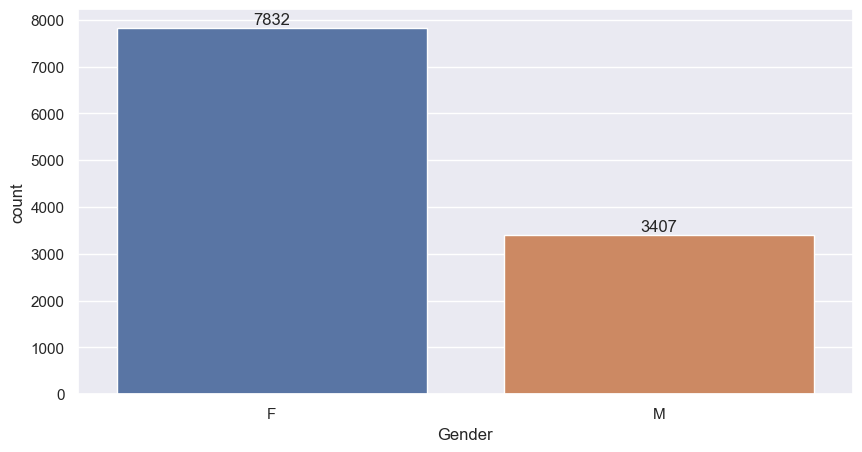

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
count1=sns.countplot(x='Gender', data=df, hue='Gender')
for bars in count1.containers:
    count1.bar_label(bars)

In [14]:
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

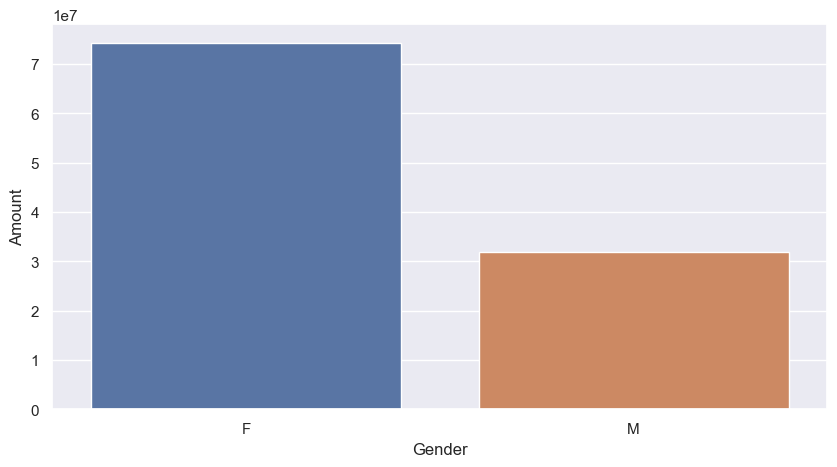

In [15]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Gender', y='Amount', data=sales_gen, hue='Gender')

#### From the above graphs we can see that most of the buyers are female and also the purchasing power of females are greater than men.

## Age

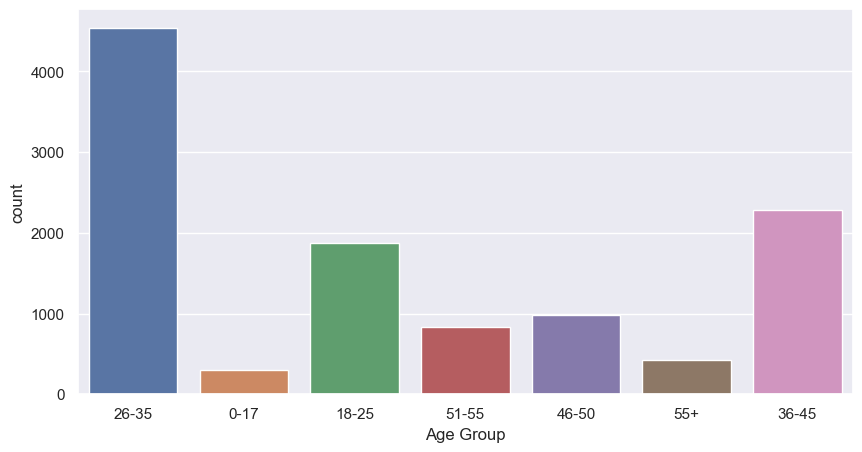

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
count2=sns.countplot(x='Age Group', data=df, hue='Age Group')

<Axes: xlabel='Age Group', ylabel='Amount'>

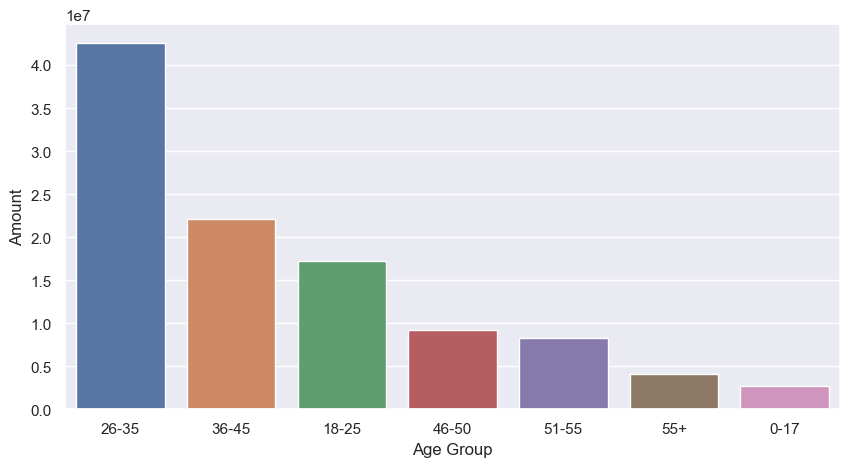

In [17]:
sns.set(rc={'figure.figsize':(10,5)})
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age, hue='Age Group')

### From above graphs we can see that most of the buyers are of Age Group 26-35 yrs.

## State

In [18]:
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

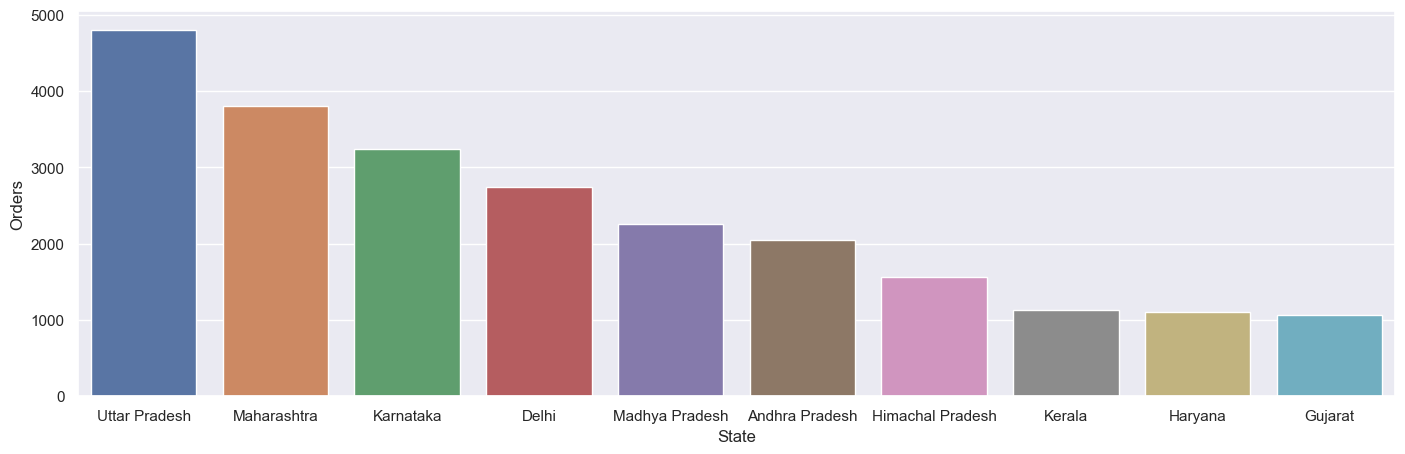

In [19]:
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State', y='Orders', data=sales_state, hue='State')


In [20]:
sales_state2=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_state2

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

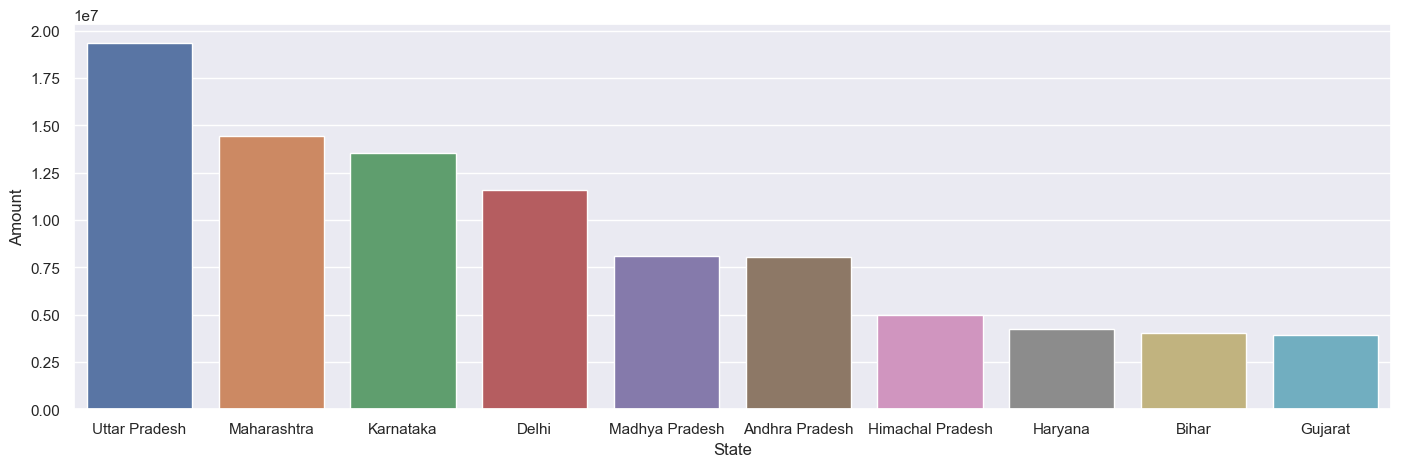

In [21]:
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State', y='Amount', hue='State', data=sales_state2)

### From the above graphs we can see that most of the orders are from UP, Maharashtra and Karnataka as per Order numbers and Purchasing power. 

## Marital Status

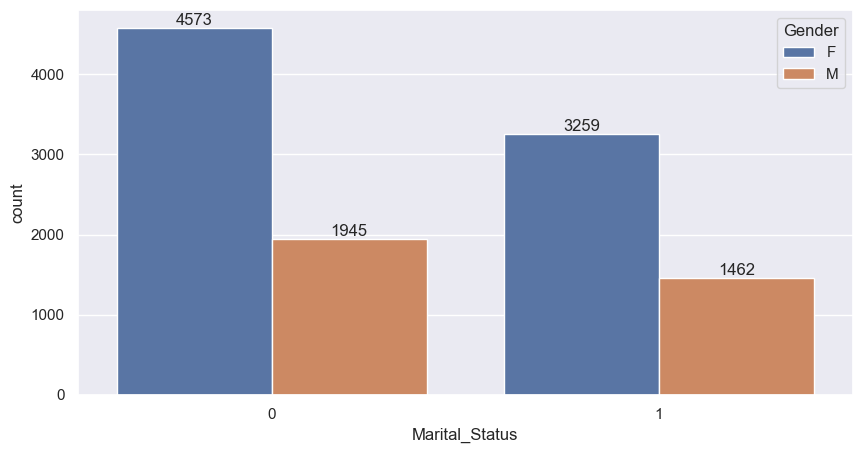

In [22]:
sns.set(rc={'figure.figsize':(10,5)})
marit_count=sns.countplot(x='Marital_Status', data=df, hue='Gender')
marit_count
for bars in marit_count.containers:
    marit_count.bar_label(bars)

In [23]:
sales_marit=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].count().sort_values('Amount', ascending=True)
sales_marit

,Marital_Status,Gender,Amount
3,1,M,1462
1,0,M,1945
2,1,F,3259
0,0,F,4573


<Axes: xlabel='Marital_Status', ylabel='Amount'>

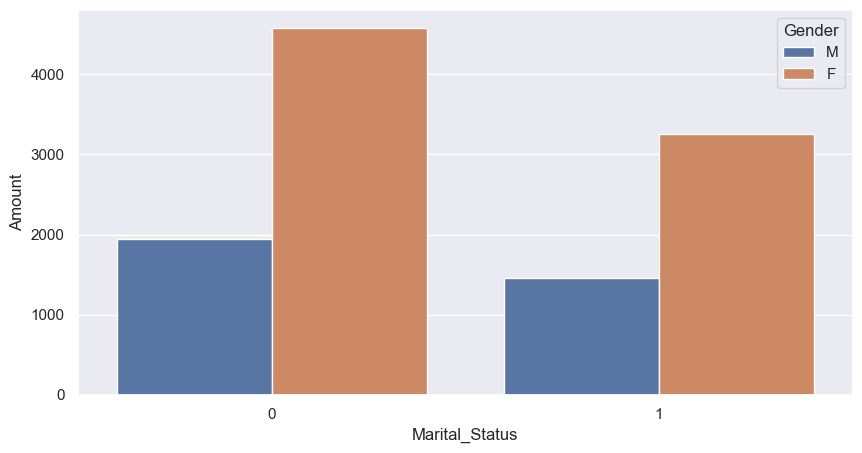

In [24]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Marital_Status', y='Amount', data=sales_marit, hue='Gender')

### From the above graphs we can see that most of the buyers are married women and they have higher purchasing power

## Occupation

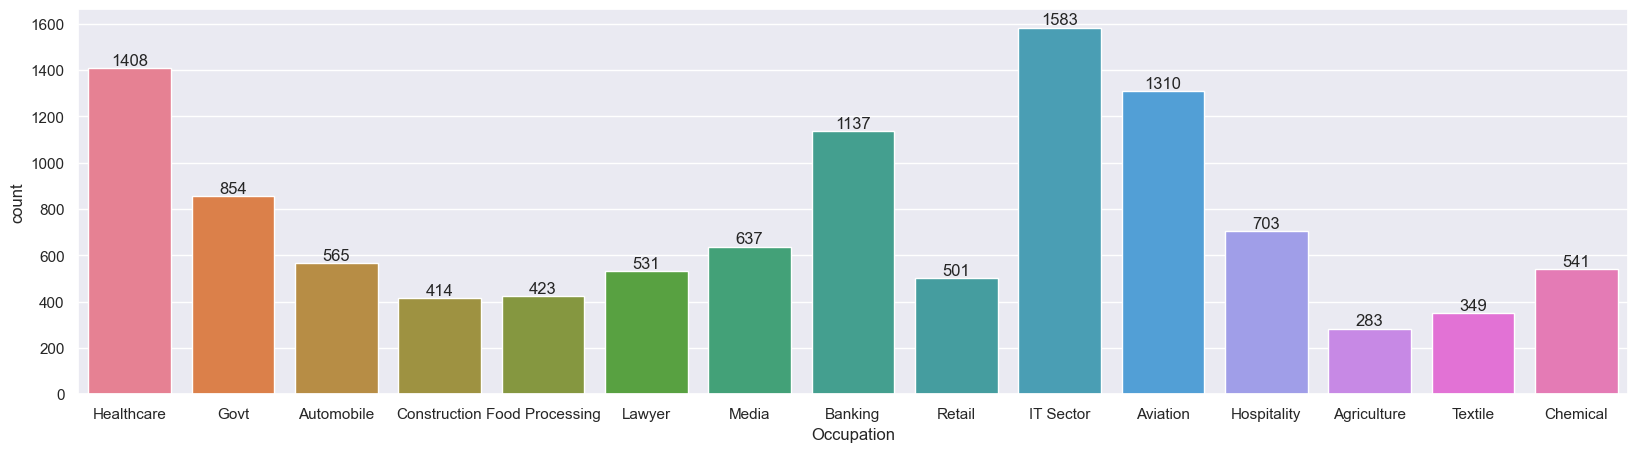

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
occ = sns.countplot(data = df, x = 'Occupation', hue='Occupation')

for bars in occ.containers:
    occ.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

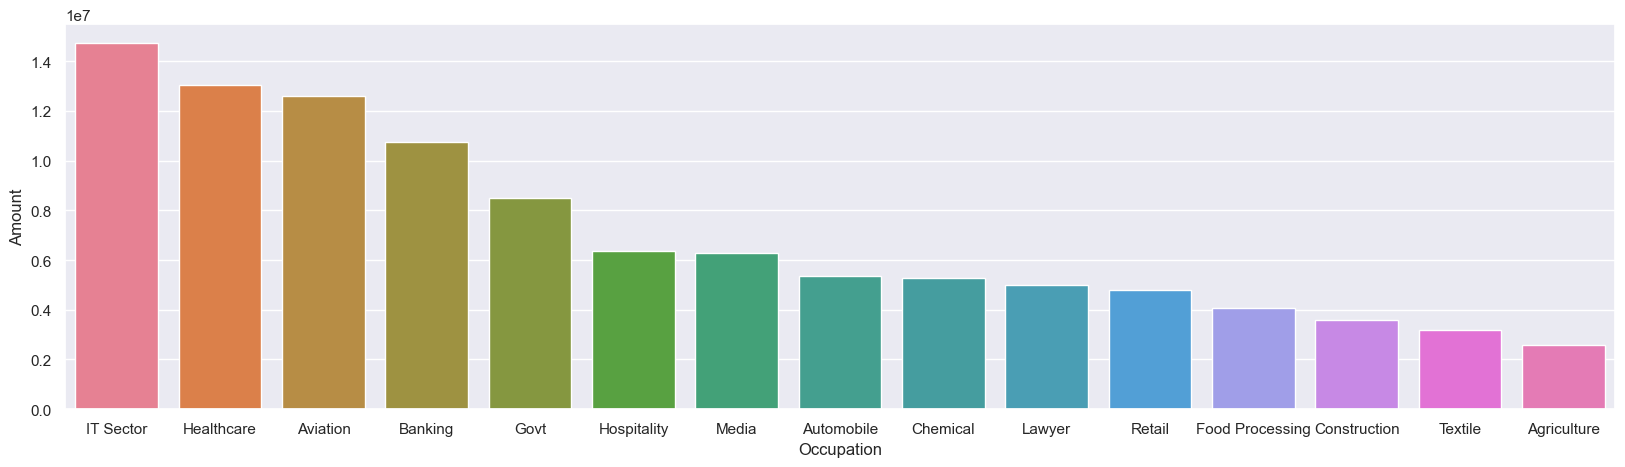

In [26]:
sales_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_occ, x = 'Occupation',y= 'Amount', hue='Occupation')

### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## Product Category

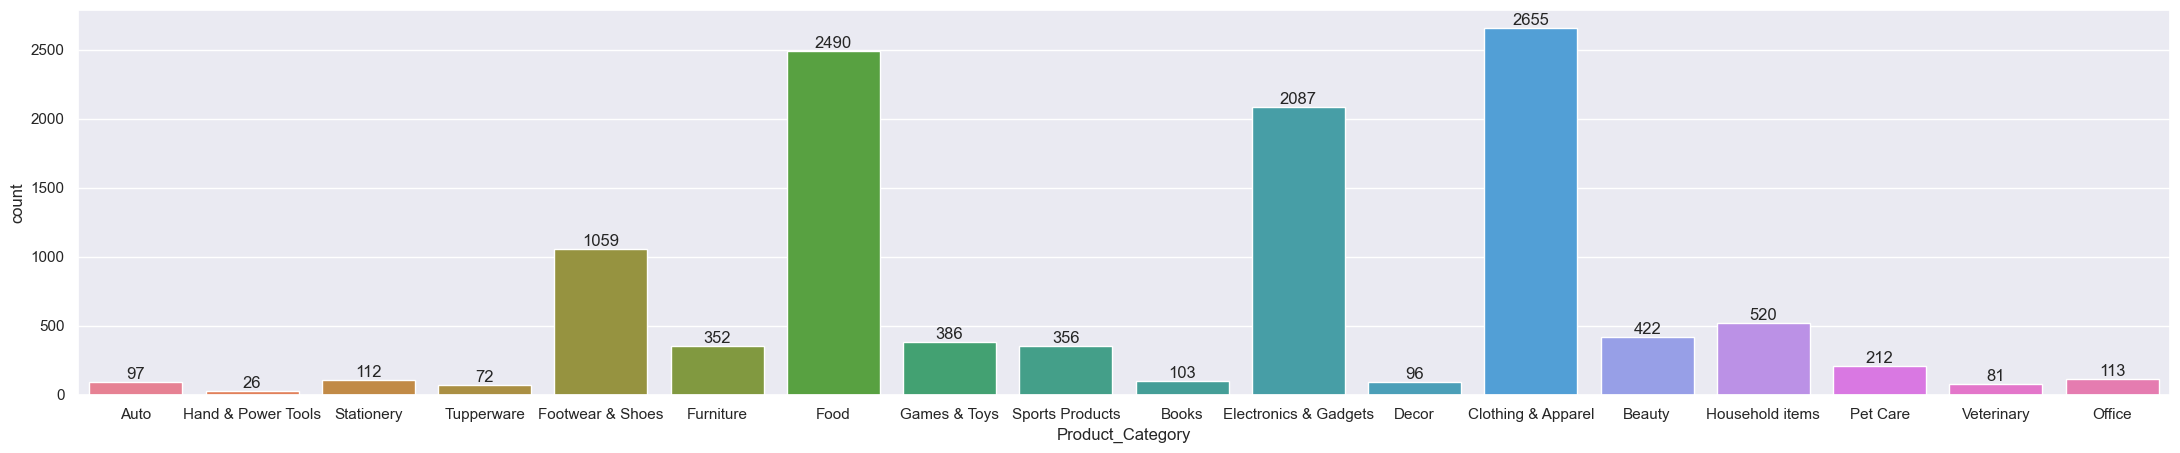

In [27]:
sns.set(rc={'figure.figsize':(27,5)})
ax = sns.countplot(data = df, x = 'Product_Category', hue='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

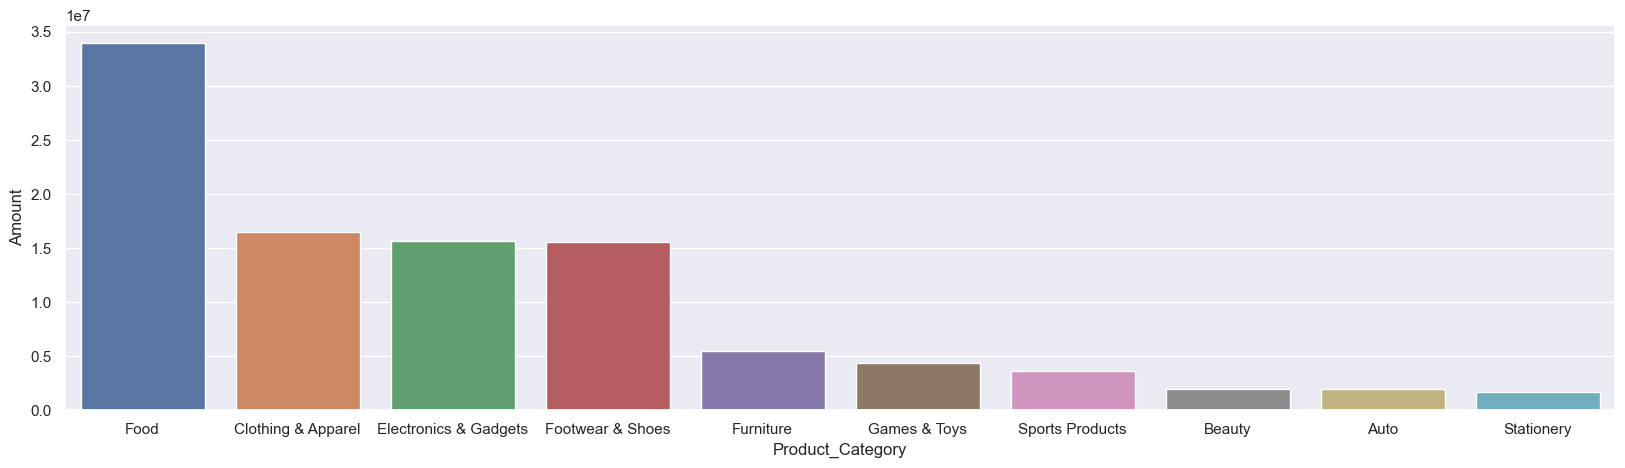

In [28]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',hue='Product_Category')

### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

# Conclusion

## Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category